# Chapter 4. Training Models

#### - 기계학습 모델과 학습 알고리즘의 작동원리 대해 알아보는 내용 
#### -  원리를 알면 적절한 모델, 학습 알고리즘, 하이퍼파라미터를 잘 활용할 수 있음 


###  1. 선형회귀모델에서 비용함수를 최소화하는 파라미터 찾기 
#### - 폐쇄형 방정식
#### - 경사하강법
- 인공신경망에서 사용할 수 있는 경사하강법의 응용 

### 2. 다항회귀모델 
#### - 비선형 데이터에 적합하면서 복잡한 모델  
#### - 오버피팅을 방지하는 방법들 (Regularized Linear Model)

### 3. 분류에 사용되는 회귀모델 
#### - Logistic 회귀 
#### - Softmax 회귀 

# 1. Linear Regression

## * 선형회귀 수식 
- 1장에서 살펴본 예제 
     - GDP 수치에 따른 삶의 만족도 예측 회귀모델 
     - 선형회귀모델 : Θ0 + Θ1 * GDP지수
         - 입력 특징 : GDP지수 
         - 모델 파라미터 : Θ0, Θ1 
         
#### - 일반적으로, 선형회귀모델은 입력 특징의 가중치의 합과 상수항(bias)를 더해 예측 

<img src = 'image\ch4\lr1.png'>
- y_hat : 예측값
- n : 특징 개수 
- xi : i번째 특징
- Θj : j번째 파라미터 (상수항은 0번째)


#### - 행렬을 이용해 표현
<img src = 'image\ch4\lr2.png'>
- hΘ(x) : x가 주어졌을때, Θ를 사용하는 가설
- Θ : 모델의 파라미터 벡터 (상수항 Θ0을 포함한 특징 가중치들)
- x : 데이터의 특징 벡터 (항상 1인 x0을 포함, xn까지 존재)

## * 측정방법
#### - 학습 전에 모델이 학습데이터에 얼마나 잘 적합하는지 측정할 방법 설정 
#### - 회귀분석 모델에서 가장 일반적인 성능 척도는 평균제곱근편차(RMSE)
#### - RMSE와 의미하는 바가 같은 MSE 사용 
<img src = 'image\ch4\mse.png'>
- m: 데이터의 개수 
- x(i) : i번째 특징 
- y(i) : i번째 라벨 
#### - MSE가 최소화되는 Θ값을 찾는 것이 목적


## 1) The Normal Equation
#### - 폐쇄방정식을 사용해 비용함수를 최소화하는 Θ값 찾기 
#### - 정규방정식 사용 
<img src = 'image\ch4\normal.png'>
- X : 특징 벡터 
- Θ_hat : 비용함수를 최소화하는 세타값 
- y : 타겟값(라벨값) 벡터

In [96]:
import numpy as np 

In [97]:
#선형 데이터 만들기 
X = 2 * np.random.rand(100, 1) #특징 
y = 4 + 3 * X + np.random.randn(100, 1) #라벨값 #가우시안 표준 정규분포로 임의의 값을 설정 후 더함 (가우시안 노이즈)

In [98]:
import matplotlib.pyplot as plt

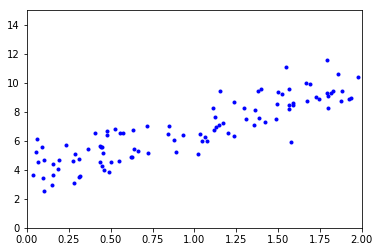

In [99]:
plt.plot(X, y, 'b.') #b. : 파란색 . 으로 표현 
plt.xlim(0.0, 2.0)
plt.ylim(0, 15)
plt.show()

In [102]:
#비용함수가 최소화되는 최적의 Θ구하기 

#0번째 특징은 무조건 1
#X0 = 1 그 열을 추가해줌 
X_b =  np.c_[np.ones((100, 1)), X] #numpy.c_ : 열 추가 


#정규방정식 적용
#numpy.linalg.inv() : 역행렬
#.T : 전치 
#dot() : 행렬곱 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best 

array([[ 3.79053121],
       [ 3.07208356]])

 - 실제 데이터 생성 시 사용한 함수는 y = 4*3X0 + 가우시안 노이즈 
 - 즉 찾고싶었던 세타값은 4와 3
 - 비슷하긴 하지만 추가된 노이즈 때문에 원래 함수의 정확한 매개변수를 찾을 수 없음

In [103]:
#구한 세타로 회귀모델 예측 작업

#새로운 데이터 추가
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #X0=1

#구한 세타로 예측 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.79053121],
       [ 9.93469834]])

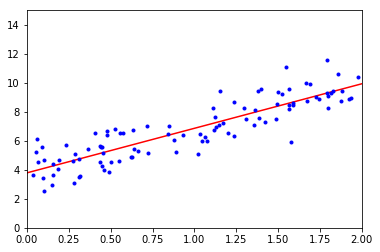

In [104]:
#회귀모델 플롯
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15]) #x축 범위 : 0~2, y축 범위 : 0~15
plt.show()

#### - Scikit-learn의 LinearRegression 클래스 사용
- 동일한 결과

In [149]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_)
#intercept_ : 상수항 
#coef_ : 파라미터 값 

-0.426060549357 [ 0.17912123  0.62803412]


In [151]:
lin_reg 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
print(lin_reg.predict(X_new))

[[ 3.79053121]
 [ 9.93469834]]


### - Computational Complexity 
#### - 정규방정식은 학습셋의 데이터 수에 선형적이기 때문에 아주 큰 학습 셋에 대해 효율적으로 다룰 수 있음 
#### - 하지만, 특징의 개수가 많아지면 계산이 느려짐

## 2) Gradient Descent
#### - 광범위한 문제의 최적 해결책을 찾을 수 있는 일반적인 최적화 알고리즘 
#### - 비용함수를 최소화하기 위해 파라미터를 반복적으로 조정함 

### - 기본적인 과정 
#### - 임의의 값 Θ 설정 (random initialization)
#### - 한 걸음씩(steps) 경사가 가장 가파른 쪽으로 나아가며 점진적으로 개선
#### - 각 단계에서 비용함수를 줄이는 작업 진행 
#### - 최종적으로 비용함수가 최소값으로 수렴함 (경사는 0)
<img src = "image\ch4\gd1.png">

#### - 경사하강법에서 주요한 파라미터는 걸음의 크기 
- 학습속도에 의해 결정됨 
     - 학습속도가 너무 작으면, 최소값 수렴을 위해 매우 많은 반복이 수행됨 (오래걸림)
     <img src = "image\ch4\gd2.png">
     
     - 학습속도가 너무 크면, 발산이 진행됨 (최적값에 도달하지 못하고 벗어남)   
     <img src = "image\ch4\gd3.png">

#### - 모든 비용함수가 그릇형태를 띄지 않음 
<img src = 'image\ch4\gd4.png'>
- 산등성이(ridge), 고원(plateau) 등 불규칙한 지형(irregular terrains)도 존재할 수 있음 
- 불규칙한 지형은 최소값으로 수렴하는것에 방해가 됨 

#### - 경사하강법의 문제점 
- 임의의 값이 왼쪽에서 시작한다면, 전역 최소값이 아닌 지역 최솟값을 수렴할 수 있음
- 임의의 값 설정이 오른쪽에서 시작한다면 고원을 지날 때까지 시간이 매우 오래걸림 
    - 이 때, 너무 일찍 멈추면 최적값에 도달하지 못 함
    
#### - 하지만 
- 선형회귀모델에 대한 MSE비용함수는 볼록(convex)함수 
- 커브에서 임의의 두 점을 선택했을 때, 이 두점을 잇는 선은 커브랑 교차하지 않음 
- 즉, 지역 최솟값은 없고 하나의 전역 최소값만 존재함을 의미 
- 또한 갑자기 경사가 변하지 않는 연속함수 
    #### - 경사하강법은 전역최소값에 임의로 접근하도록 보장함 
    <img src = "image\ch4\gd5.png">
    - 실제 비용함수는 그릇 형태를 가지지만 특징의 척도(scale)이 다른 경우 긴 그릇 형태가 될 수 있음 
    - 왼쪽, 두 특징의 척도가 같음 
    - 오른쪽, 특징2가 특징1보다 큰 값을 가짐 
        - 왼쪽보다 오른쪽이 최솟값에 도달하는데 오래걸림 
        #### - 경사하강법 사용시, feature scale은 중요함 
        
#### - 파라미터가 많을 수록 차원이 증가하고 탐색난이도가 높아짐 

### 1> Batch Gradient Descent
#### - 경사 하강을 구하려면, 각각의 모델 파라미터에 대한 비용함수를 계산해야 함 
#### - 파라미터가 변경되었을때, 비용함수가 얼마나 달라지는가 계산 
#### - 편미분 (partial derivative)
    - 파라미터 Θj와 관련하여 비용함수의 편미분 계산
<img src = "image\ch4\bgd1.png">
    - 한번에 계산 (기울기 벡터 : 각 파라미터와 관련한 
    비용함수의 모든 편미분을 포함)
<img src = "image\ch4\bgd2.png">
#### - 편미분은 각 경사 하강 단계에서 학습 셋(X)의 전체에 대한 계산이 필요함 (일괄적 경사하강법)
    - 큰 학습 데이터에서는 속도가 느림 
    - 특징들이 많을 때는 정규방정식을 사용하는 것 보다는 빠름 
#### - 구한 기울기 벡터가 오르막을 가리킨다면, 반대 방향을 가리켜야함(내리막)
    - Θ에서 기울기 벡터를 뺀 것
    - 학습 속도기 작용함 (걸음의 크기 조정)
<img src = "image\ch4\bgd3.png">

In [108]:
eta = 0.1 #학습 속도 
n_iterations = 1000 #반복횟수 
m = 100 #데이터 개수 

#임의의 값으로 초기값 설정 (random inirialization)
theta = np.random.randn(2,1) 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #편미분
    theta = theta - eta * gradients #다음 스텝(조정된 파라미터)
    
print(theta) 

[[ 3.79053121]
 [ 3.07208356]]


 - 정규방정식에서 구한 값과 일치 

#### - 학습속도를 변경한 경우 

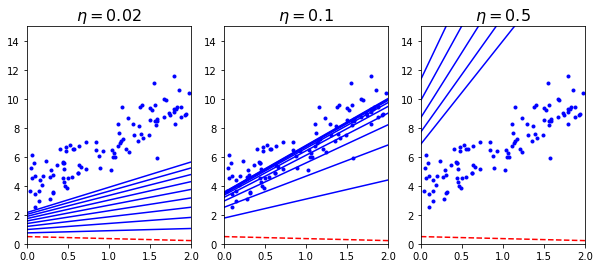

In [109]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b) #데이터의 개수 
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
       
   
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

 - 왼쪽, 너무 낮은 학습속도로 최적값에 도달하기까지 너무 오래 걸림 
 - 가운데, 짧은 반복 안에 최적값에 도달함 
 - 오른쪽, 학습속도가 너무 높아 벗어남 

#### - 적절한 반복횟수를 지정해야 함 
- 적은 반복횟수 : 반복이 끝날때까지 최적값에 도달하지 못할 수 있음 
- 많은 반복횟수 : 더이상 값이 변하지 않는데 반복이 계속 진행되어 시간낭비 
- 그러므로, 초기에 반복횟수를 크게 설정하고 기울기 벡터가 작아지면 interrupt를 주는 방법이 있음 

#### ※ Convergence Rate
- 비용함수가 볼록함수이고 경사가 더이상 크게 변하지 않으면 고정된 학습속도는 O(1/반복횟수)에 수렴할 수 있음 

### 2> Stochastic Gradient Descent
#### - Batch Gradient Descent는 모든 단계에서 기울기 계산을 위해 전체 학습 데이터를 사용해야 함 (느림)
#### - 반면, SGD는 모든 단계에서 학습데이터에서 무작위로 데이터를 선택하고 그 데이터의 기울기만 계산 (빠름)
#### - 각 반복마다 해당 데이터의 메모리에서만 작동 (대량 데이터 학습 가능)
#### - 확률적으로 랜덤한 데이터를 추출하기 떄문에 규칙적이지 않음 
    - 지역최소값에서 벗어날 수 있게 해 줌 
    - 전역최소값을 찾기 더 수월함 
#### - 비용함수가 최소값에 도달할때 까지 완만하지만 평균적으로 감소 
<img src = "image\ch4\sgd1.png">
    - 반복이 계속되면, 최소값에 매우 근접은 하지만 특정 지점에서 끝나지 않고 주변을 맴 돎
    - 알고리즘이 중지되었을때, 최종 파라미터가 최적의 값이 아닐 수 있음 
    

#### - 학습 스케줄 
    - 학습 스케줄 : 각 반복에서 학습 속도를 결정하는 함수 
    - 최적의 값을 찾지 못하는 문제를 해결하기 위해 점진적으로 학습 속도를 낮춤 
    - 처음에는 큰 학습속도로 시작 (초기의 빠른 진행, 지역최소값 벗어나기)
    - 점차적으로 학습속도를 낮춤 (전역최소값에 정착)    

In [111]:
n_epochs = 50
t0, t1 = 5, 50  # 학습스케줄 매개변수

#학습 스케줄 함수 
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 초기값으로 임의의 값

for epoch in range(n_epochs):
    for i in range(m): #m=100
        #임의의 데이터 선택
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        #선택된 임의의 데이터의 기울기 구하기 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        #학습스케줄 설정
        eta = learning_schedule(epoch * m + i)
        
        #내리막을 가리키도록
        theta = theta - eta * gradients
        
print(theta)

[[ 3.82837399]
 [ 3.04909861]]


#### - SGD의 초기 10단계
<img src = 'image\ch4\sgd2.png'>
#### - 데이터를 랜덤하게 선택하기 떄문에 여러번 선택되는 데이터, 한번도 선택되지 않는 데이터 존재 가능 
   - 주기마다 모든 데이터가 선택될 수 하기 위해서는 매 주기마다 학습 데이터를 섞음
        - 느려질 수 있음 

#### - Scikit-learn의 SGDRegressor 클래스 사용 
- 기본값으로 제곱오차 비용함수 최적화 

In [112]:
from sklearn.linear_model import SGDRegressor

#penealty = None : 정규화를 하지 않음 
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta=0.1, random_state=42)
sgd_reg.fit(X, y.ravel()) #y.ravel() : y값

#intercept_ : 상수항, coef_ : 파라미터 값 
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\jsh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 3.8339672]), array([ 3.14244598]))

 - 정규방정식값과 비슷한 결과가 나옴 (약간 더 나음)

### 3> Mini-batch Gradient Descent
#### - BGD와 SGD를 합친 것 
#### - 임의로 구성된 데이터의 작은 셋의 기울기를 계산 
#### - 특히 GPU를 사용할 때 행렬 작업의 하드웨어적 최적화로 인해 더 좋은 성능을 얻을 수 있음
#### - SGD보다 덜 뷸규칙적 
- 최종적으로 최소값에 더 가까운 값을 얻을 수 있음 
- 지역 최소값에서 벗어나느 것은 더 어려울 수 있음
- SGD와 마찬가지로 학습스케줄을 통해 해결 가능 

### 세가지 경사하강법 비교 
<img src = "image\ch4\gda.png">
<img src = "image\ch4\gda2.png">
    
    - m : 학습데이터의 수 
    - n : 특징의 수 
- 학습 이후에는 별 차이가 없음 
- 세 알고리즘 모두 최종적으로는 거의 같은 모델로 죵료되며, 거의 동일한 예측을 함

# 2. Polynomial Regression
## 1) 비선형 데이터에 선형모델 적용하기 
### 각 특징에 힘을 더해 새로운 특징을 만들어 그 특징을 학습 
#### - 예
- 이차방정식으로 데이터 생성(노이즈 추가)

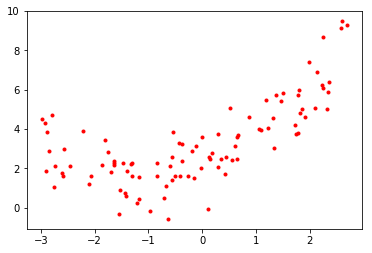

In [115]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, 'r.')
plt.show()

- 단순 직선 모델을 적용하기는 어려움 

#### -Scikit-learn의 PolynomialFeatures 클래스 사용 

In [116]:
from sklearn.preprocessing import PolynomialFeatures

#새로운 특징을 만들때, 상수항은 포함하지 않음 
#새로운 특징 : 기존 특징의 제곱 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0]) #원래값
print(X_poly[0]) #원래값, 제곱한값(새로운 특징값)

[ 1.90673058]
[ 1.90673058  3.63562152]


In [117]:
#새로운 특징으로 선형모델에 적용하기 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#상수항, 파라미터값
lin_reg.intercept_, lin_reg.coef_

(array([ 2.21842821]), array([[ 1.01617367,  0.45401965]]))

- 생성함수가 0.5 * X**2 + X + 2 + 가우시안 노이즈 
- 얻은 수식 0.4 * X**2 + 1.0X + 2.21 
- 나쁘지 않은 결과

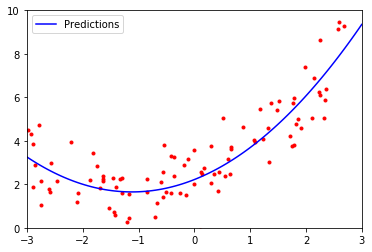

In [119]:
#새로운 데이터로 다중회귀 모델 생성  
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "r.")
plt.plot(X_new, y_new, "b-", label='Predictions')
plt.legend()
plt.axis ([-3, 3, 0, 10])
plt.show()

#### - 다중회귀는 주어진 차원의 모든 특징의 조합을 더함 
#### - 여러개의 특징이 있을때, 다중회귀는 특징들 간의 관계를 찾을 수 있음  

## 2) Learning Curves
#### -고차원의 다항회귀 수행 시 , 단순 선형회귀보다 학습데이터가 훨씬 더 잘 맞을 수 있음 
<img src = "image\ch4\lc.png">
- 300차원의 모델이 1차, 2차 모델보다 학습데이터에 더 잘 맞음 
    - 선형회귀모델(1차) : underfitting
    - 300차 다항회귀모델 : overfitting
    - 2차 다항회귀모델 : 가장 일반화된 모델 
        - 데이터 생성 때, 2차원 모델을 사용했기 때문 
- △ 데이터가 어떻게 생성되었는지 항상 알 순 없음 
- 일반적인 모델에서 모델이 얼마나 복잡해야하며 overfitting 인지 underfitting인지 파악할 수 있을까

### - 모델의 복잡도와 overfitting, undefitting 측정하기 
#### - 교차검증(cross-validation) (2장)
- overfitting : 학습용셋의 성능은 좋지만 검증용셋의 성능이 좋지 않음
- underfitting : 학습용셋, 검증용셋의 성능이 모두 좋지 않음

#### - 학습곡선(learning curve) 
- 학습셋과 검증셋의 성능에 대한 모델의 성능을 그래프로 표현 
- 그래프를 그리기 위해선, 학습셋의 서로 다른 크기의 subset을 여러번 훈련시켜야 함

In [120]:
#학습곡선을 그리는 함수 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#(사용한모델, 학습데이터, 타겟값)을 파라미터로 넘김
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors = []
    val_errors = []
    for m in range(1, len(X_train)):
        #다른크기의 subset으로 나누기 
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        
        y_val_predict = model.predict(X_val)
        
        #RMSE 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)

### - 선형회귀모델에 대한 학습곡선 

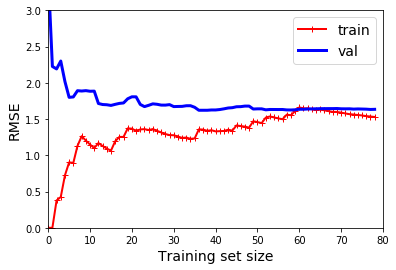

In [121]:
#학습곡선 그리기 
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

#### - 학습셋
- 데이터가 1~2개일 때, 모델이 완벽하게 맞아서 0에서 시작 
- 데이터가 점점 추가되면서 오차 증가 
- 고원(plateau)에 도달하면 더이상 오차가 좋아지거나 나빠지지 않음 

#### - 검증셋 
- 데이터가 적을때는 일반화를 제대로 할 수 없어 오차 값이 높음
- 데이터가 점점 추가되면서 오차가 낮아짐 
- 마찬가지로 고원에 도달하면 큰 변화가 없음 
     - 전형적인 underfitting 모델 
     
### Underfitting 모델의 특징 
#### - 학습셋, 검증셋의 학습곡선이 모두 고원에 도달함 
#### - 두 곡선 사이의 거리가 가까움 
#### - 오차 값이 꽤 높음 

#### - underfitting 해결 
- 더 복잡한 모델 사용 
- 좋은 특징 추가 

### - 10차 다항식 모델의 학습곡선 
 - 더 복잡한 모델 사용 

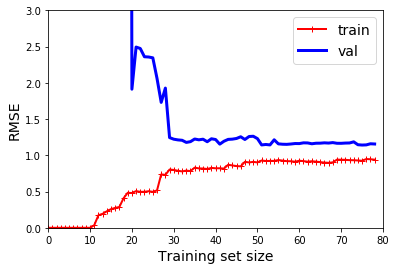

In [124]:
from sklearn.pipeline import Pipeline

#다항모델 사용 
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
     ])

#학습곡선 그리기 
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

#### - 선형회귀모델의 학습곡선과의 차이점 
- 학습셋의 오차가 선형회귀모델보다 훨씬 낮음 
- 곡선 사이 간격이 존재 : 검증셋보다 학습셋이 훨씬 잘 수행됨 (overfitting) 
    - 하지만 데이터가 추가되면서 곡선의 간격이 점점 줄어듦

### Overfitting 모델의 특징 
#### - 검증셋, 학습셋 사이의 간격 존재 
#### - overfitting 해결
- 더 많은 학습 데이터를 추가
- 모델 정규화

# ※ The Bias/Variance Tradeoff
#### 모델의 일반화 오류를 세가지 방법으로 표현 가능 
## - 편향 (Bias)
#### - 잘못된 예측으로 인한 일반화 오류 
#### - 편향이 클 수록 underfitting 가능성 높음 

## - 변동 (Variance)
#### - 학습데이터의 작은 변동에 대해 모델이 지나치게 미감하게 반응함으로 인한 일반화 오류 
#### - 고차원의 모델일수록 변동성이 높음 
#### - 변동성이 높을수록 overfitting 가능성 높음

## - 더이상 줄일 수 없는 오차 (Irreducible Error)
#### - 데이터 자체의 노이즈로 인한 오차 
#### - 데이터 손질(이상치 제거 등)로 해결 



## * Tradeoff 관계
#### - 모델의 복잡도가 높을수록 변동은 크고 편향은 낮음 
#### -모델의 복잡도가 낮을수록 변동은 작고 편향은 큼

## 3) Regularized Linear Model
### overfitting을 해결하기 위해 모델 정규화 
#### - 자유도가 작을 수록 overfitting 가능성이 낮아짐 
- 다항모델에서는 다항식 차수를 줄이는 방법을 사용 
- 선형모델에서는 대게 모델의 가중치를 제한하는 방법 사용 
    - Ridge Regression
    - Lasso Regression
    - Elastic Net

### 1> Ridge Regrssion 
#### - Tikhonov Regulation
#### - 비용함수에 정규화항을 더함 (학습 동안만 적용)
- 학습알고리즘이 데이터에 적합할 뿐 아니라 모델 가중치를 가능한 작게 유지함 
<img src = 'image\ch4\rr.png'>
- α : 하이퍼파라미터, 모델을 얼마나 정규화할지 제어 (α = 0이면, 단순선형회귀와 같음)
- α가 커질수록 모든 가중치는 0에 가까워짐 (결과는 데이터의 평균을 지나는 평평한 직선이 됨)
- 상수항(Θ0)은 정규화되지 않음 

#### - 특징 가중치 벡터(Θ1~)을 w로 정의 
- 가중치 벡터의 l2 norm을 의미하게됨 
- 경사하강법 사용시, MSE 기울기 벡터에 αw만 더하면 됨 

#### ※ Ridge 회귀 분석은 특징의 척도(scale)에 민감 
- StandardScaler등을 통해 특징 스케일링 필요 
- 거의 대부분의 정규화 모델도 마찬가지 

### - Ridge회귀분석 
<img src = 'image\ch4\rr2.png'>
- 왼쪽 
    - 일반 ridge 모델이 적용되어 선형 예측 
- 오른족 : ridge 모델을 적용한 다항 회귀 
    - 데이터를 먼저 다항 모델로 확장(PolynomialFeature 사용) 
    - 특징 스켕일링 (StandardScaler 사용)
    - 후 ridge 모델 적용 
- α(하이퍼파라미터)가 증가하면 (정규화가 많이 진행되면) 예측이 평평해짐 
    - 예측이 덜 극단적이고 합리적임 (모델의 변동은 낮지만 편향이 높음)
    
### - Ridge 회귀분석 수행 방법 
#### - 폐쇄방정식 사용 (closed-form equation) 
<img src = 'image\ch4\rr3.png'>
- Sickit-learn의 Ridge 클래스 사용 

In [125]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
#alpha값 지정 
#solver : ridge regression을 어떻게 수행할것인지 
#cholesky : 폐쇄방정식 사용 

ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 4.68661525]])

#### - 경사하강법 사용 
- Scikit-learn의 Stochastic Gradient Descent 사용 

In [127]:
sgd_reg = SGDRegre.ssor(penalty="l2")
#penalty : 어떤 방법으로 정규화할것인가 

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\jsh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 3.69445785])

### 2> Lasso Regression 
#### - 비용함수에 정규화항을 더하는 방식 
#### - l1 규제방법 사용 
<img src = 'image\ch4\lassor.png'>
### - Lasso 회귀분석
<img src = 'image\ch4\lassor2.png'>
- 왼쪽
    - 일반 lasso 모델이 적용되어 선형예측 
- 오른쪽 : lasso 모델을 적용한 다항 회귀
    - 데이터를 먼저 다항 모델로 확장(PolynomialFeature 사용) 
    - 특징 스켕일링 (StandardScaler 사용)
    - 후 lasso 모델 적용 
- 중요하지 않은 특징의 가중치를 완전히 없앰(0으로 설정)
    - 오른쪽 그림의 초록색 점선 
        - 거의 선형인 이차방정식으로 보임 
        - 모든 고차 다항식의 가중치가 0일 것을 알 수 있음 
        - 즉, lasso 회귀는 자동으로 특징선택을 수행하고 결과로 sparse 모델을 출력함

### - Lasso vs Ridge
<img src = 'image\ch4\lvr.png'>
- 배경의 타원 : 정규화되지 않은 MSE 비용함수 (α=0)
    - 어두울수록 깊음 
- 흰색 원 : 비용함수에서 Batch Gradient Descent의 경로 
- 노란색 삼각형 : 그 패널티에 대해서만 BGD 경로 (α는 무한대에 수렴)
- 빨간점 : 최종 Θ값
- 왼쪽 위 
    - 다이아몬드 등고선 : l1 패널티(정규화)를 적용한 비용함수 
    - 비용함수를 최소화하는 Θ값은 0
    - 패널티에 대한 BGD는 처음 Θ1=0에 도달한 후 Θ2=0에 접근 
- Lasso
    - α=0.5인 l1 패널티를 포함함
    - 전역최소값은 Θ2=0축에 존재 
    - BGD는 먼저 Θ2=0에 도달하고 전역최소갓에 도달할 때까지 수행 
- 왼쪽 아래 
    - 타원 등고선 : l2 패널티를 적용한 비용함수 
    - 비용함수를 최소화하는 Θ값은 0
    - 패널티에 대한 BGD는 바로 Θ=0에 도달 
- Ridge
    - α=0.5인 l2 패널티를 포함함
    - 정규화된 최소값이 정규화되지 않은 최소값보다 Θ=0에 가까움 
    - 하지만 가중치는 충분히 제거되지 않음 


#### ※Tip
- Lasso 비용함수에서 BGD경로는 바닥에서 튕겨오르는 경향이 있음 
    - Θ2=0에서 갑자기 경사가 변했기 때문
- 그러므로 전역최소값에 잘 도달하기 위해서는 학습 속도를 점차 줄이는 것이 좋음 

#### - Lasso 비용함수는 Θi=0 일때, 큰 차이를 보이지 않지만 subgradient 벡터 g를 사용하면 경사하강법이 계속 진행됨 
- Lasso 비용함수로 경사하강법을 수행할 때, 사용할 수 있는 subgradient 벡터 
<img src = 'image\ch4\lrsv.png'>

#### - Scikit-learn의 Lasso 클래스 사용 
- 대신 SGDRegressor(penalty='l1') 사용 가능

In [128]:
from sklearn.linear_model import Lasso 

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 4.62826826])

### 3> Elastic Net
#### - Ridge와 Lasso 의 중간 
#### - ridge와 lasso의 정규화항을 섞어서 정규화항 생성 (r로 혼합비율 조정)
<img src = 'image\ch4\en.png'>
- r=0, ridge regression과 동일 
- r=1, lasso regression과 동일 

#### - Sickit-learn의 ElasticNet클래스 사용 

In [129]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
#l1_ratio : 혼합비율(r)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 4.63363191])

### - 언제 어떤것을 사용? (선형, Ridge, Lasso, Elastic Net)
#### - 일반적으로 선형회귀는 피해야함 
#### - Ridge가 흔하게 사용
#### - 많은 특징 중 몇가지 특징만 중요하다고 생각되면 Lasso, Elastic Net 사용 
- 필요없는 특징의 가중치를 0으로 둠 

#### - 분석하기 쉬운 모델을 원하면 Lasso 사용 
- 입력 특징 중 일부만 사용함으로 쉽게 해석 가능 

#### - 일반적으로 Lasso보다는 Elastic Net을 더 선호함 
- 여러 특징들이 강하게 상호연관을 가질때, 
- 학습 데이터의 개수가 특징의 개수보다 많을 때, 
- Lasso는 불규칙하게 동작할 가능성이 있음 

### 4> Early Stopping
#### - 반복학습알고리즘을 정규화하는 다양한 방법들은 유효성 에러가 최소에 도달하면 학습을 멈춰야 하는 것 

#### - 복잡한 모델이 BGD를 이용하여 학습되는 과정
<img src = 'image\ch4\es.png'>
- 주기가 진행되면서 학습셋과 검증셋의 RMSE가 점차 낮아짐 
- 검증셋으 RMSE가 다시 증가하는 지점 존재 (overfit이 시작됨을 알림)
- Early Stopping을 통해 유효성에러가 최소에 도달하는 즉시 학습을 멈춰야 함 

#### - SGD, MGD를 사용할 경우 곡선이 평탄하지 않음 
- 어떤 지점이 최소값인지 파악하기 어려움 
     - 유효성 검사가 최소 시간 이상 경과한 경우 학습을 멈춤 
     - 멈추고 유효성 에러가 최소가 되는 파라미터 지점로 돌아감 

# 3. Logistic Regression 
#### 일부 회귀 알고리즘을 분류에 사용할 수 있음 
#### : 일반적으로 데이터가 특정 클래스에 속할 확률 추정에 사용 
<img src = 'image\ch4\ep.png'>
#### - 예) 추정확률이 50%보다 높으면 1(양수 클래스), 낮으면 0(음수클래스)에 속한다 예측 

## 1)  Estimating Probabilities
#### - 입력특징 (상수항 포함)의 가중치의 합을 계산 
#### - logistic으로 결과 출력 
- logistic : 0과 1사이의 수가 출력되는 sigmoid 함수 
<img src = 'image\ch4\sigmoid.png'>
- 0.5를 기준으로 0, 1

<img src = 'image\ch4\sigmoid2.png'>
- 어떤 클래스에 속할 확률을 먼저 구하면 예측값을 구하기 더 수월해짐 


## 2) Training and Cost Function
#### 어떻게 학습되는가 
<img src = 'image\ch4\lg.png'>
<img src = 'image\ch4\lg2.png'>
#### - 이 비용함수를 최소화하는 Θ값을 계산하는 폐쇄방정식이 존재하지 않음 
#### - 경사하강법 사용 
- 비용함수가 볼록함수라 전역최소값에 도달함을 보장함 
<img src = 'image\ch4\lg3.png'>


## 3) Decision Boundaries 
#### 아이리스 데이터 사용 
- 3종류의 아이리스에 대해 꽃받침의 길이, 너비와 꽃잎길이, 너비를 포함한 총 150개의 데이터 
<img src = 'image\ch4\iris.png'>
- 라벨값
    - Setosa : 0
    - Versicolor : 1
    - Virginica : 2 

In [136]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [137]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [138]:
iris['target'] #라벨값

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### - 꽃잎의 너비를 기반으로 Virginica 분류하는 분류기 만들기

In [140]:
X = iris["data"][:, 3:]  # 꽃잎의 너비 
y = (iris["target"] == 2).astype(np.int)  # 만약 Virginica이면 1, 아니면 0

In [141]:
#회귀분석
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

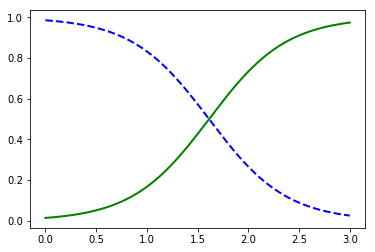

In [143]:
#꽃의 너비가 0~3cm 까지 변하는 꽃(새로운 데이터)에 대한 모델의 예상확률 

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

#초록색 : Virginica일 확률
#파란색 : Virginica가 아닐 확률 
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

plt.show()

<img src = 'image\ch4\iris2.png'>
- Virginica의 너비(초록색 사각형)는 다른 꽃들보다 너비가 크다 
- 그래프 상에서 2cm 이상은 virginica라 확신
- 1cm 이하는 virginica가 아니라 판단 
- 하지만, 확실한 분류기준은 아님 

In [145]:
#predict()를 사용해 클래스 예측 
#가장 확률이 높은 클래스가 반환됨

#새로운 데이터 (1.5), (1.7)
#기준값은 약 1.6
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### - 두개의 특징 (너비, 길이)에 대한 분류기 
- 로지스틱 회귀 분류기는 새로운 꽃의 두가지 특징을 기반으로 virginica가 맞는지 아닌지 확률 추정 
<img src = 'image\ch4\iris3.png'>
- 검은 점선은 모델의 50%를 추정하는 지점 
    - decision boudary
        - 선형 경계
    - 각각의 평행성은 15%에서 90%에 이르기까지의 확률을 추정하는 선 
- 모델에 따르면 오른쪽 상단의 모든 꽃은 virginica임


### - 로지스틱 회귀모델도 l1, l2 패널티 이용 
- Scikit-learn에서는 기본값으로 l2 사용 

### ※ Scikit-learn의 LogisticRegression
- 다른 선형모델에서는 α를 모델의 정규화 강도를 조정하는 하이퍼파라미터로 사용 
- sklearn의 로지스틱회귀에서는 α의 역수인 C를 사용 
- C값이 높을수록 덜 정규화된 모델임을 의미 

## 4) Softmax Regression 
#### 다항분류 
#### - 로지스틱 회귀모델로 여러 이진분류기의 학습, 결합 없이 직접 multiple class를 구하는 방법
### 확률 추정 및 예측 방법
#### - 과정 
- 데이터 x가 주어짐 
- 각 클래스 k에 대해 점수를 계산 
    - 점수를 계산하는 방정식 
    <img src = 'image\ch4\softmax.png'>

        - 각 클래스는 고유한 파라미터 벡터 Θ(k)를 가짐
        - 모든 벡터는 일반적으로 파라미터 행렬 Θ의 행으로 저장됨 
        
- softmax 함수를 사용해 각 클래스의 확률 계산 
    - softmax 함수로 확률 계산하는 방정식
    <img src = 'image\ch4\softmax2.png'>
        - k : 클래스의 수 
        - s(x) : 데이터 x에 대해 각 클래스의 점수를 포함하는 벡터 
        
- 로지스틱 회귀와 같이 가장 높은 점수를 갖는 클래스를 예측값으로 봄 
    <img src = 'image\ch4\softmax3.png'>
    
#### - Softmax 회귀는 한번에 한 클래스만을 예측함 
- 한 사진에서 여러 사람을 인식할 때는 사용할 수 없음 


### 학습 방법 
#### - 목표는 타겟 클래스에 대한 높은 확률을 추정하는 모델 만들기 
#### - 비용함수로 cross-entropy 사용 
- cross-etropy
    - 정보이론에 기초 
    - 예상 클래스 확률 집합이 타겟 클래스와 얼마나 잘 일치하는가를 측정할 때 사용 
    - 두 값의 차이가 클 수록 큰 값을 반환 
    - 두 값이 같으면 최소값 반환 
    <img src = 'image\ch4\ce.png'>
        - y(i)에서 i번째 데이터의 클래스가 k이면 1이고, 아니면 0 
        - 만약 클래스가 2개라면, 로지스틱 회귀의 비용함수와 같음 
        
#### - 과정
- 모든 클래스에 대한 기울기 벡터 계산 
- 경사하강법(등)을 사용하여 비용함수를 최소화하는 파라미터 행렬 Θ찾기 
<img src = 'image\ch4\ce2.png'>


### 적용 
#### - iris 데이터를 3종류로 나누기 위해 softmax 사용 
#### - Scikit-learn의 LogisticRegression 클래스 사용 
- 하이퍼파라미터 multi-class를 'multinomial'로 설정 
- softmax 회귀를 지원하는 특징 solver 선택 필요 
- 기본값으로 l2 정규화가 수행됨 (하이퍼파라미터 C로 설정 가능)

In [146]:
X = iris['data'][:, (2, 3)]  #꽃잎의 길이, 너비
y = iris['target']

#softmax회귀 적용 
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
softmax_reg.predict([[5, 2]])

array([2])

- 두번째 클래스인 virginica로 예측 

In [148]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])

- 2번째 클래스의 확률값이 가장 높음 

#### - 배경색으로 구분되는 결정 범위 
<img src = 'image\ch4\softmax4.png'>
- 모든 두 클래스에 대한 결정 경계는 선형적 
- 곡선으로 Iris-Versicolor 클래스에 대한 확률 표현 (0.45:45%확률의 결정경계)
- 모델은 50% 이하의 측정확률도 예측할 수 있음 
    - 모든 결정경계가 만나는 지점은 각 클래스 모두 33%의 동일한 확률이 측정됨